# Mustererkennung/Machine Learning - Assignment 8



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
class Classifier:
    
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)


data = pd.read_csv("/content/drive/MyDrive/ML_Class_2020/Perceptron/iris.data", header=None)
data.head(n=5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Splitting the data into training/test and according to their class memberships

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[list(range(4))], data[4], test_size=0.2, random_state=None, stratify=data[4])

X_train_setosa = X_train[y_train=='Iris-setosa'].to_numpy()
X_train_versicolor = X_train[y_train=='Iris-versicolor'].to_numpy()
X_train_virginica = X_train[y_train=='Iris-virginica'].to_numpy()

X_test_setosa_v_v = X_test.to_numpy()
y_test_setosa_v_v = (y_test == 'Iris-setosa').astype(int).to_numpy()

X_test_versicolor_virginica = X_test[y_test!='Iris-setosa'].to_numpy()
y_test_versicolor_virginica = (y_test[y_test!='Iris-setosa'] == 'Iris-versicolor').astype(int).to_numpy()

In [ ]:
y_test_setosa_v_v

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
class Perceptron(Classifier):
    
    def fit(self, P, N, max_iterations=None):
        self.prepare_fit(P, N)
        if max_iterations is None:
            while True:
                self._update_weights()
                if self.accuracy(self.y, (self.X @ self.w) > 0.5) == 1:
                    return self.w
        else:
            for _ in range(max_iterations):
                self._update_weights()
                if self.accuracy(self.y, (self.X @ self.w) > 0.5) == 1:
                    return self.w
        return self.w
    
    def _update_weights(self):
        for x, y in zip(self.X, self.y):
            if y == 1 and x @ self.w <= 0.5:
                self.w += x
            elif y == 0 and x @ self.w > 0.5:
                self.w -= x

    def prepare_fit(self, P, N):
        X_ordered = np.concatenate((np.ones((len(P)+len(N), 1)), np.concatenate((P, N))), axis=1)
        y_ordered = np.concatenate((np.ones(len(P)), np.zeros(len(N))))
        self.X, self.y = shuffle(X_ordered, y_ordered)
        self.w = np.zeros(self.X.shape[1])
    
    def predict(self, X_test):
        ones = np.ones((len(X_test), 1))
        X_test = np.concatenate((ones, X_test), axis=1)
        predictions = X_test @ self.w
        return (predictions > 0.5).astype(int)

In [ ]:
model = Perceptron()

In [ ]:
model.fit(X_train_setosa, np.concatenate((X_train_versicolor, X_train_virginica)), max_iterations=None)
predictions_setosa_v_v = model.predict(X_test_setosa_v_v)
model.accuracy(y_test_setosa_v_v, predictions_setosa_v_v)

1.0

In [ ]:
model.fit(X_train_versicolor, X_train_virginica, max_iterations=1000)
predictions_v_v = model.predict(X_test_versicolor_virginica)
model.accuracy(y_test_versicolor_virginica, predictions_v_v)

0.85

(40, 4)
(80, 4)


0.9

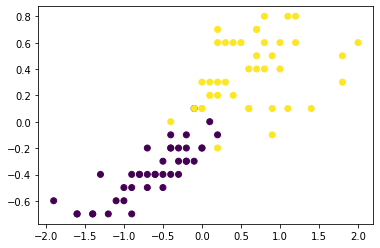

In [ ]:
X = np.concatenate((X_train_versicolor, X_train_virginica))
print(X_train_versicolor.shape)
mean_X = X.mean(axis = 0)
print(X.shape)
X = X - mean_X
labels = np.concatenate((np.zeros(len(X_train_versicolor)),np.ones(len(X_train_virginica))))
plt.scatter(X[:,2],X[:,3], c = labels)
plt.show

model.fit(X_train_versicolor - mean_X, X_train_virginica  - mean_X, max_iterations=1000)
predictions_v_v = model.predict(X_test_versicolor_virginica - mean_X)
model.accuracy(y_test_versicolor_virginica, predictions_v_v)